## Analysis to run

In [ ]:
'''
# 1) Cut of hate crime over 2020 by district top by counts  - done
2) Cut of hate crime by law code type, what is the highest in the city
3) Highest type of crime over time - pick the top one
4) 6 month change over the year delta, top 5 
'''

In [1]:
import numpy as np
import pandas as pd

/Users/rjasinski/py3/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [23]:
main = pd.read_csv('NYPD_Hate_Crimes.csv')
main_copy = main.copy()

In [26]:
main.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Other Motive Description,Arrest Date,Arrest Id
0,201904600132799,2019,2,02/08/2019,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL(GAY),Sexual Orientation,NaN,02/08/2019,B19606200
1,201904800157499,2019,3,03/09/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610772
2,201904800154599,2019,3,03/08/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610788
3,201904800159299,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610788
4,201904200333499,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-ISLAMIC(MUSLIM),Religion/Religious Practice,NaN,05/10/2019,B19620156


## Slim the data down to 2020 and clean up data we are using

In [27]:
main = main[main['Complaint Year Number'] == 2020]

In [28]:
main = main[['Month Number',
             'Record Create Date',
             'Patrol Borough Name',
             'County',
             'Law Code Category Description',
             'Bias Motive Description',
             'Offense Category',
             'Arrest Date']]

In [30]:
main.rename(columns={'Month Number': 'Month',
                     'Patrol Borough Name': 'Borough',
                     'Law Code Category Description': 'Crime Type',
                     'Bias Motive Description': 'Bias'}, inplace=True)

In [31]:
main.head()

,Month,Record Create Date,Borough,County,Crime Type,Bias,Offense Category,Arrest Date
13,2,02/06/2020,PATROL BORO BRONX,BRONX,MISDEMEANOR,ANTI-MALE HOMOSEXUAL(GAY),Sexual Orientation,02/06/2020
14,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020
15,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020
16,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020
17,4,04/12/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice,04/29/2020


## Bargraph of crime by borough

In [99]:
crimes_by_burough = main[['Borough', 'Offense Category']] 

In [114]:
crimes_by_burough.groupby(['Borough', 'Offense Category']).agg({'Offense Category': 'count'})

Offense Category
Borough                   Offense Category                                    
PATROL BORO BKLYN NORTH   Ethnicity/National Origin/Ancestry                 2
                          Gender                                            12
                          Other                                              2
                          Race/Color                                         9
                          Religion/Religious Practice                       26
PATROL BORO BKLYN SOUTH   Gender                                             1
                          Race/Color                                         7
                          Religion/Religious Practice                       43
                          Sexual Orientation                                 4
PATROL BORO BRONX         Race/Color                                         8
                          Religion/Religious Practice                        9
                          Sexual Orientation                                 9
PATROL BORO MAN NORTH     Ethnicity/National Origin/Ancestry                 1
                          Gender                                             2
                          Other                                              1
                          Race/Color                                        10
                          Religion/Religious Practice                       14
                          Sexual Orientation                                 6
PATROL BORO MAN SOUTH     Ethnicity/National Origin/Ancestry                 1
                          Gender                                             1
                          Race/Color                                        22
                          Religion/Religious Practice                       18
                          Sexual Orientation                                 7
PATROL BORO QUEENS NORTH  Age                                                1
                          Ethnicity/National Origin/Ancestry                 2
                          Gender                                             1
                          Race/Color                                         9
                          Religion/Religious Practice                       12
                          Sexual Orientation                                 2
PATROL BORO QUEENS SOUTH  Ethnicity/National Origin/Ancestry                 1
                          Race/Color                                         5
                          Religion/Religious Practice                       11
                          Sexual Orientation                                 5
PATROL BORO STATEN ISLAND Race/Color                                        11
                          Religion/Religious Practice                        5
                          Sexual Orientation                                 2

## Where did the most hate crimes occur in 2020

In [81]:
ranked_borough_by_crime = main.groupby('Borough', as_index=False).agg({"Bias": "count"}).rename(columns={'Bias': 'Crime Count'}).sort_values('Crime Count', ascending=False)
ranked_borough_by_crime_top = ranked_borough_by_crime.head(5)
ranked_borough_by_crime_top.head()

,Borough,Crime Count
1,PATROL BORO BKLYN SOUTH,55
0,PATROL BORO BKLYN NORTH,51
4,PATROL BORO MAN SOUTH,49
3,PATROL BORO MAN NORTH,34
5,PATROL BORO QUEENS NORTH,27


<AxesSubplot:>

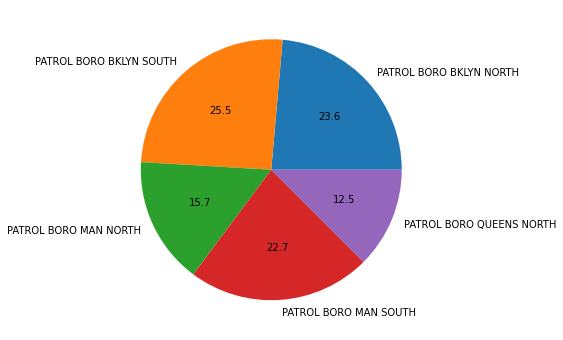

In [84]:
# Take the top 5 from above, use it to get all our lines from main data source and graph that beautiful data
main[main['Borough'].isin(list(ranked_borough_by_crime_top['Borough']))].groupby(['Borough']).size().plot.pie(figsize=(6, 6), ylabel='', autopct="%.1f",)

<AxesSubplot:>

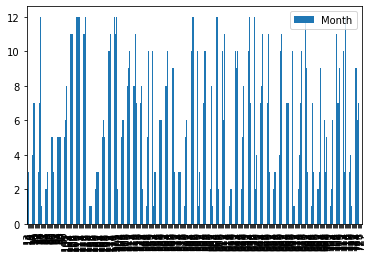